## 仓位管理-fixed_loss

 一、固定损失加仓法基础版


 二、固定损失加仓法激进版


三、固定损失加仓法保守版

## 1.固定损失加仓法基础版
盈利加仓模型的一个缺点是加仓后把成本拉高，亏损几率增加。

### 固定损失加仓法：
（1）每次加仓都是固定仓位，为开仓的手数。

（2）第一次加仓后如果产生亏损并且总盈利变成0，则出场，停止这次交易，保证第一次加仓不会产生亏损

（3）若成功加仓，成功进行第二次加仓，使用第一次加仓与第二次加仓的总手数计算盈利率，如果等于0，则出场停止交 易，因为是固定手数，所以从第二次加仓开始，策略总能保持第一笔交易的盈利。

 见 onBar ‘固定损失加仓模块’
 
 用参数 nPos 控制加仓次数，参数 Ratio 控制加仓的进场位置，参数fixsize控制最大仓位手数
 
 每次加仓手数为fixsize
 
### 算法如下（这里以盈利/亏损2%举例）：

if 持多头仓位 and 当前加仓次数 nPos < 3：

    if 加仓次数大于等于1：
    
        if 上一次加仓亏损1%：
        
            sell 全部多头头寸
    
    if 盈利率达到2%：
    
        nPos = nPos+1

        加仓fixsize手
        

elif 持空头仓位 and 当前加仓次数 nPos < 3：

    if 加仓次数大于等于1：
    
        if 上一次加仓亏损1%：
        
            cover 全部空头头寸
    
    if 盈利率达到2%：
    
        nPos = nPos+1

        加仓fixsize手
        

### 当执行平仓信号，将 nPos 重置为 0 

if 持有多头仓位 and 死叉：

    nPos = 0
    
elif 持有空头仓位 and 金叉：

    nPos = 0

In [ ]:
## 大的价格除以小的价格减1
lastOrder=self.transactionPrice[symbol]
## 多头亏损大于一个百分比
(self.transactionPrice[symbol] - bar.close)/bar.close
= lastOrder/bar.close-1

## 多头盈利大于一个百分比
(bar.close-self.transactionPrice[symbol])/self.transactionPrice[symbol]
= bar.close/lastOrder-1

## 空头亏损大于一个百分比
(bar.close - self.transactionPrice[symbol])/self.transactionPrice[symbol]
= bar.close/lastOrder-1

## 空头盈利大于一个百分比
(self.transactionPrice[symbol] - bar.close)/bar.close
= lastOrder/bar.close-1

In [ ]:
# 设置参数
    nPos = 0
    fixsize = 100
    transactionPrice = {}
    Ratio = 0.02   
# 设置变量
    self.transactionPrice = {s: 0 for s in self.symbolList}

#在onBar中添加:
        lastOrder=self.transactionPrice[symbol]
    # 固定损失加仓模块______________________________________

        if (self.posDict[symbol+'_LONG']!=0 and self.nPos < 3):    # 持有多头仓位并且加仓次数不超过3次
            if self.nPos >= 1:   # 上一次的加仓之后亏损达到原来盈利比例的一半
                if lastOrder/bar.close-1 >= self.Ratio/2: 
                    self.sell(symbol,bar.close*0.98, self.posDict[symbol+'_LONG']) # 全部头寸出场
            if bar.close/lastOrder-1>= self.Ratio:   # 计算盈利比例,达到2%
                self.nPos += 1  # 加仓次数减少 1 次
                self.buy(symbol,bar.close*1.02,self.fixsize)  # 加仓数量固定fixsize
                
        elif (self.posDict[symbol + "_SHORT"] != 0 and self.nPos < 3):    # 持有空头仓位并且加仓次数不超过3次
            if self.nPos >= 1:   # 上一次的加仓之后亏损达到原来盈利比例的一半
                if bar.close/lastOrder-1>= self.Ratio/2:
                    self.cover(symbol,bar.close*1.02, self.posDict[symbol+'_SHORT']) # 全部头寸出场
            if lastOrder/bar.close-1 >= self.Ratio:   # 计算盈利比例,达到2%
                self.nPos += 1  # 加仓次数减少 1 次
                self.short(symbol,bar.close*0.98,self.fixsize)  # 加仓数量固定fixsize

## 2.固定损失加仓法激进版
盈利加仓模型的一个缺点是加仓后把成本拉高，亏损几率增加。

### 固定损失加仓法激进版：
（1）每次加仓都是当前仓位的手数，因此每次加仓后总仓位都变成加仓前的2倍（proportion倍）

（2）每一次加仓后如果产生亏损并且总盈利变成0，则出场，停止这次交易，保证加仓不会产生亏损，但有损失所有盈利的风险

见 onBar ‘固定损失加仓激进版模块’

用参数 nPos 控制加仓次数，参数 Ratio 控制加仓的进场位置，参数fixsize控制最大仓位手数，参数proportion控制每一次加仓的数量，即加仓后是加仓前的倍数，参数add_fixsize为每一次加仓的手数。

### 算法如下（这里以盈利/亏损2%举例）：

if 持多头仓位 and 当前加仓次数 nPos< 3：

    if 加仓次数大于等于1：
    
        if 所有盈利回测100%：
        
            sell 全部多头头寸
    
    if 盈利率达到2%：
    
        nPos = nPos+1
        
        add_fixsize(加仓手数) = fixsize*proportion(加仓后总仓位) - self.fixsize(当前仓位)

        加仓add_fixsize手
        
        self.fixsize(更新当前仓位) = add_fixsize + self.fixsize
        

elif 持空头仓位 and 当前加仓次数 < 3：

    if 加仓次数大于等于1：
    
        if 所有盈利回测100%：
        
            cover 全部多头头寸
    
    if 盈利率达到2%：
    
        nPos = nPos+1
        
        add_fixsize(加仓手数) = fixsize*proportion(加仓后总仓位) - self.fixsize(当前仓位)

        加仓add_fixsize手
        
        self.fixsize(更新当前仓位) = add_fixsize + self.fixsize
        

### 当执行平仓信号，将 nPos 重置为 0 

if 持有多头仓位 and 死叉：

    nPos = 0
    
elif 持有空头仓位 and 金叉：

    nPos = 0

In [ ]:
# 设置参数
    nPos = 0
    fixsize = 100
    transactionPrice = {}
    Ratio = 0.02
    proportion = 2    
    
# 设置变量    
    self.transactionPrice = {s: 0 for s in self.symbolList}
    
#在onBar中添加:    
        lastOrder=self.transactionPrice[symbol]
    # 固定损失加仓激进版模块______________________________________
        if (self.posDict[symbol+'_LONG']!=0 and self.nPos < 3):    # 持有多头仓位并且加仓次数不超过3次
            if self.nPos >= 1: # 上一次的加仓亏损达到原来盈利比例的 1/proportion 倍
                if lastOrder/bar.close-1 >= self.Ratio/self.proportion: 
                    self.sell(symbol,bar.close*0.98, self.posDict[symbol+'_LONG'])
            if bar.close/lastOrder-1>= self.Ratio:   # 计算盈利比例,达到2%
                self.nPos += 1  # 加仓次数减少 1 次
                add_fixsize = self.fixsize*self.proportion - self.fixsize
                self.buy(symbol,bar.close*1.02, add_fixsize)  # 加仓数量
                self.fixsize = add_fixsize + self.fixsize
        elif (self.posDict[symbol + "_SHORT"] != 0 and self.nPos < 3):    # 持有空头仓位并且加仓次数不超过3次
            if self.nPos >= 1: # 上一次的加仓亏损达到原来盈利比例的 1/proportion 倍
                if bar.close/lastOrder-1>= self.Ratio/self.proportion:
                    self.cover(symbol,bar.close*1.02, self.posDict[symbol+'_SHORT'])
            if lastOrder/bar.close-1 >= self.Ratio:   # 计算盈利比例,达到2%
                self.nPos += 1  # 加仓次数减少 1 次
                add_fixsize = self.fixsize*self.proportion - self.fixsize
                self.short(symbol,bar.close*0.98,self.fixsize)  # 目标仓位100手，分别加仓25手、20手、15手，10手
                self.fixsize = add_fixsize + self.fixsize

## 3.固定损失加仓法保守版
 固定损失加仓法激进版在加仓的同时有损失盈利的风险。优化版本如下
 
### 固定损失加仓法保守版：

（1）在激进版的基础上，每一次正方向加仓同时，往反方向加2/1仓位，若发生回撤时，则反方向的仓位能盈利，若继续往正方向，则平掉反方向的头寸

 见 onBar ‘固定损失加仓保守版模块’
 
 用参数 nPos 控制加仓次数，参数 Ratio 控制加仓的进场位置，参数fixsize控制最大仓位手数，参数proportion控制每一次加仓的数量，即加仓后是加仓前的倍数，参数add_fixsize为每一次加仓的手数。
 
### 算法如下（这里以盈利/亏损2%举例）：

if 持多头仓位 and 当前加仓次数 nPos < 3：

    if 加仓次数大于等于1：
    
        if 所有盈利回测100%：
        
            sell 全部多头头寸
            
            cover 全部空头头寸
    
    if 盈利率达到2%：
    
        nPos = nPos+1
        
        add_fixsize(加仓手数) = fixsize*proportion(加仓后总仓位) - self.fixsize(当前仓位)

        多头加仓 add_fixsize 手
        
        空头开仓 add_fixsize/2 手
        
        self.fixsize(更新当前仓位) = add_fixsize + self.fixsize
        

elif 持空头仓位 and 当前加仓次数 < 3：

    if 加仓次数大于等于1：
    
        if 所有盈利回测100%：
        
            cover 全部空头头寸
            
            sell 全部多头头寸
    
    if 盈利率达到2%：
    
        nPos = nPos+1
        
        add_fixsize(加仓手数) = fixsize*proportion(加仓后总仓位) - self.fixsize(当前仓位)

        空头加仓 add_fixsize 手
        
        多头开仓 add_fixsize/2 手
        
        self.fixsize(更新当前仓位) = add_fixsize + self.fixsize
        

### 当执行平仓信号，将 nPos 重置为 0 

if 持有多头仓位 and 死叉：

    nPos = 0
    
elif 持有空头仓位 and 金叉：

    nPos = 0

In [ ]:
# 设置参数
    nPos = 0
    fixsize = 100
    transactionPrice = {}
    Ratio = 0.02
    proportion = 2
# 设置变量    
    self.transactionPrice = {s: 0 for s in self.symbolList}

#在onBar中添加:
        lastOrder=self.transactionPrice[symbol]
        # 固定损失加仓保守版模块______________________________________
        if (self.posDict[symbol+'_LONG']!=0 and self.nPos < 3):    # 持有多头仓位并且加仓次数不超过3次
            if self.nPos >= 1: # 上一次的加仓亏损达到原来盈利比例的 1/proportion 倍
                if lastOrder/bar.close-1 >= self.Ratio/self.proportion: 
                    self.sell(symbol,bar.close*0.98, self.posDict[symbol+'_LONG'])
                    self.cover(symbol,bar.close*1.02, self.posDict[symbol+'_SHORT'])
                elif bar.close/firstOrder-1>= self.Ratio/self.proportion:
                    self.cover(symbol,bar.close*1.02, self.posDict[symbol+'_SHORT'])
            if bar.close/lastOrder-1>= self.Ratio:   # 计算盈利比例,达到2%
                self.nPos += 1  # 加仓次数减少 1 次
                add_fixsize = self.fixsize*self.proportion - self.fixsize
                self.buy(symbol,bar.close*1.02, add_fixsize)  # 加仓数量为
                self.short(symbol,bar.close*0.98, add_fixsize/2)
                self.fixsize = add_fixsize + self.fixsize
                
        elif (self.posDict[symbol + "_SHORT"] != 0 and self.nPos < 3):    # 持有空头仓位并且加仓次数不超过3次
            if self.nPos >= 1: # 上一次的加仓亏损达到原来盈利比例的 1/proportion 倍
                if bar.close/lastOrder-1>= self.Ratio/self.proportion:
                    self.cover(symbol,bar.close*1.02, self.posDict[symbol+'_SHORT'])
                    self.sell(symbol,bar.close*0.98, self.posDict[symbol+'_LONG'])
                elif lastOrder/bar.close-1 >= self.Ratio/self.proportion: 
                    self.sell(symbol,bar.close*0.98, self.posDict[symbol+'_LONG'])
            if lastOrder/bar.close-1 >= self.Ratio:   # 计算盈利比例,达到2%
                self.nPos += 1  # 加仓次数减少 1 次
                add_fixsize = self.fixsize*self.proportion - self.fixsize
                self.short(symbol,bar.close*0.98,self.fixsize)  # 目标仓位100手，分别加仓25手、20手、15手，10手
                self.buy(symbol,bar.close*1.02, add_fixsize)
                self.fixsize = add_fixsize + self.fixsize

### 固定损失加仓案例

In [1]:
"""
固定损失加仓，这里的Demo是一个最简单的双均线策略实现
"""

from __future__ import division
from vnpy.trader.vtConstant import *
from vnpy.trader.app.ctaStrategy.ctaBarManager import CtaTemplate
import numpy as np
import talib as ta
from datetime import timedelta

########################################################################
# 策略继承CtaTemplate
class DoubleMaStrategy(CtaTemplate):
    """双指数均线策略Demo"""
    className = 'DoubleMaStrategy'
    author = 'ChannelCMT'
    
    # 策略参数
    barPeriod = 200
    fastWindow = 60     # 快速均线参数
    slowWindow = 120     # 慢速均线参数
    
    # 参数列表，保存了参数的名称
    paramList = ['name',
                 'className',
                 'author',
                 'fastWindow',
                 'slowWindow']    
    
    # 变量列表，保存了变量的名称
    varList = ['barPeriod']  
    nPos = 0
    fixsize = 100
    transactionPrice = {}
    Ratio = 0.02
    # 同步列表，保存了需要保存到数据库的变量名称
    syncList = ['posDict', 'eveningDict']

    #----------------------------------------------------------------------
    def __init__(self, ctaEngine, setting):
        # 首先找到策略的父类（就是类CtaTemplate），然后把DoubleMaStrategy的对象转换为类CtaTemplate的对象
        super().__init__(ctaEngine, setting)
      
    #----------------------------------------------------------------------
    def onInit(self):
        """初始化策略（必须由用户继承实现）"""
        self.writeCtaLog(u'双EMA演示策略初始化')
        
        # 生成Bar数组
        self.setArrayManagerSize(self.barPeriod)
        self.transactionPrice = {s: 0 for s in self.symbolList}


        self.mail("chushihuaaaaaaaaaaaaaaaaaaaaaaaaa")
        self.putEvent()

    #----------------------------------------------------------------------
    def onStart(self):
        """启动策略（必须由用户继承实现）"""
        self.writeCtaLog(u'双EMA演示策略启动')
        self.putEvent()
    
    #----------------------------------------------------------------------
    def onStop(self):
        """停止策略（必须由用户继承实现）"""
        self.writeCtaLog(u'策略停止')
        self.putEvent()
        
    #----------------------------------------------------------------------
    def onTick(self, tick):
        """收到行情TICK推送（必须由用户继承实现）"""
        pass
        
    #----------------------------------------------------------------------
    def onBar(self, bar):
        """收到Bar推送（必须由用户继承实现）"""
        symbol = bar.vtSymbol
        lastOrder=self.transactionPrice[symbol]
    # 固定损失加仓模块______________________________________

        if (self.posDict[symbol+'_LONG']!=0 and self.nPos < 3):    # 持有多头仓位并且加仓次数不超过3次
            if self.nPos >= 1:   # 上一次的加仓之后亏损达到原来盈利比例的一半
                if lastOrder/bar.close-1 >= self.Ratio/2: 
                    self.sell(symbol,bar.close*0.98, self.posDict[symbol+'_LONG']) # 全部头寸出场
            if bar.close/lastOrder-1>= self.Ratio:   # 计算盈利比例,达到2%
                self.nPos += 1  # 加仓次数减少 1 次
                self.buy(symbol,bar.close*1.02,self.fixsize)  # 加仓数量固定fixsize
                
        elif (self.posDict[symbol + "_SHORT"] != 0 and self.nPos < 3):    # 持有空头仓位并且加仓次数不超过3次
            if self.nPos >= 1:   # 上一次的加仓之后亏损达到原来盈利比例的一半
                if bar.close/lastOrder-1>= self.Ratio/2:
                    self.cover(symbol,bar.close*1.02, self.posDict[symbol+'_SHORT']) # 全部头寸出场
            if lastOrder/bar.close-1 >= self.Ratio:   # 计算盈利比例,达到2%
                self.nPos += 1  # 加仓次数减少 1 次
                self.short(symbol,bar.close*0.98,self.fixsize)  # 加仓数量固定fixsize
                
        
        # 发出状态更新事件
        self.putEvent()
        
    def on30MinBar(self, bar):
        """30分钟K线推送"""
        symbol = bar.vtSymbol
    
        am30 = self.getArrayManager(symbol, "30m")

        if not am30.inited:
            return
        
        # 计算策略需要的信号-------------------------------------------------
        fastMa = ta.EMA(am30.close, self.fastWindow)        
        slowMa = ta.EMA(am30.close, self.slowWindow)

        crossOver = fastMa[-1]>slowMa[-1] and fastMa[-2]<=slowMa[-2]     # 金叉上穿
        crossBelow = fastMa[-1]<slowMa[-1] and fastMa[-2]>=slowMa[-2]   # 死叉下穿
        
        if crossOver:
            print('crossOver:',crossOver)
        elif crossBelow:
            print('crossBelow:',crossBelow)
        
        # 构建进出场逻辑-------------------------------------------------
        # 金叉和死叉的条件是互斥
        if crossOver:
            # 如果金叉时手头没有持仓，则直接做多
            if (self.posDict[symbol+'_LONG']==0) and (self.posDict[symbol+'_SHORT']==0):
                self.buy(symbol, bar.close*1.02, self.fixsize*0.3)
            # 如果有空头持仓，则先平空，再做多
            elif self.posDict[symbol+'_SHORT'] >0:
                self.cancelAll()
                self.cover(symbol,bar.close*1.02, self.posDict[symbol+'_SHORT'])
                self.nPos = 0
                self.buy(symbol,bar.close*1.02, self.fixsize*0.3)

        # 死叉和金叉相反
        elif crossBelow :
            if (self.posDict[symbol+'_LONG']==0) and (self.posDict[symbol+'_SHORT']==0):
                self.short(symbol,bar.close*0.98, self.fixsize*0.3)
            elif self.posDict[symbol+'_LONG'] >0:
                self.cancelAll()
                self.sell(symbol,bar.close*0.98, self.posDict[symbol+'_LONG'])
                self.nPos = 0
                self.short(symbol,bar.close*0.98, self.fixsize*0.3)
        
        # 发出状态更新事件
        self.putEvent()
    #----------------------------------------------------------------------
    def onOrder(self, order):
        """收到委托变化推送（必须由用户继承实现）"""
        # 对于无需做细粒度委托控制的策略，可以忽略onOrder
#         print(u'出现未知订单，需要策略师外部干预,ID:%s, symbol:%s,direction:%s,offset:%s'% (order.vtOrderID, order.vtSymbol, order.direction, order.offset))
        pass
    
    #----------------------------------------------------------------------
    def onTrade(self, trade):
        """收到成交推送（必须由用户继承实现）"""
        symbol = trade.vtSymbol
        self.transactionPrice[symbol] = trade.price
        pass
    
    #----------------------------------------------------------------------
    def onStopOrder(self, so):
        """停止单推送"""
        pass

## 绩效测试

仓位字典构造完成 
初始仓位: {'BTCUSDT:binance_LONG': 0, 'BTCUSDT:binance_SHORT': 0}
[DEBUG] 注册品种BTCUSDT:binance上的on_1m_bar函数functools.partial(<function DoubleMaStrategy.onBar at 0x00000214B3C1FB70>, <__main__.DoubleMaStrategy object at 0x00000214B3A85EF0>)
[DEBUG] 注册品种BTCUSDT:binance上的on_30Min_bar函数functools.partial(<function DoubleMaStrategy.on30MinBar at 0x00000214B3C1FBF8>, <__main__.DoubleMaStrategy object at 0x00000214B3A85EF0>)
2018-11-15 17:11:26.815116	开始回测
2018-11-15 17:11:26.815116	策略初始化
2018-11-15 17:11:26.817114	载入历史数据。数据范围:[20180923 04:00,20181001 12:00)
2018-11-15 17:11:59.793681	失去MongoDB的连接，我们尝试使用本地缓存数据，请注意数据量
2018-11-15 17:11:59.806681	载入完成，数据量：12000
2018-11-15 17:11:59.807688	策略初始化完成
2018-11-15 17:11:59.807688	策略启动完成
2018-11-15 17:11:59.807688	开始回放回测数据,回测范围:[20181001 12:00,20181031 16:00)
2018-11-15 17:11:59.820678	载入历史数据。数据范围:[20181001 12:00,20181031 16:00)
2018-11-15 17:12:37.876812	失去MongoDB的连接，我们尝试使用本地缓存数据，请注意数据量
2018-11-15 17:12:37.918777	载入完成，数据量：43230
2018-11-15 17:12:37.9

D:\Anaconda3\lib\site-packages\vnpy_fxdayu-1.1.13.dev181104-py3.6.egg\vnpy\trader\app\ctaStrategy\ctaBacktesting.py:1287: RuntimeWarning: invalid value encountered in log
  df['return'] = (np.log(df['balance']) - np.log(df['balance'].shift(1))).fillna(0)


2018-11-15 17:14:01.109477	策略回测绩效图已保存


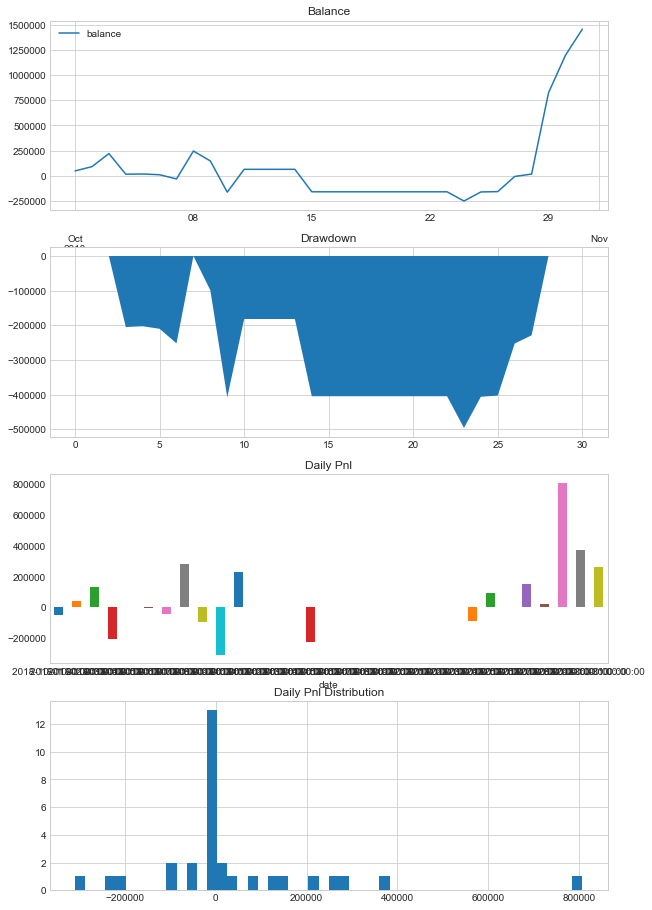

2018-11-15 17:14:01.883788	计算回测结果
2018-11-15 17:14:01.890782	交割单已生成
2018-11-15 17:14:01.891780	------------------------------
2018-11-15 17:14:01.891780	第一笔交易：	2018-10-04 22:30:00
2018-11-15 17:14:01.891780	最后一笔交易：	2018-10-31 15:58:00
2018-11-15 17:14:01.891780	总交易次数：	11
2018-11-15 17:14:01.891780	总盈亏：	1,314,045.31
2018-11-15 17:14:01.891780	最大回撤: 	-1,065,331.1
2018-11-15 17:14:01.891780	平均每笔盈利：	119,458.66
2018-11-15 17:14:01.891780	平均每笔滑点：	0.0
2018-11-15 17:14:01.891780	平均每笔佣金：	31,644.06
2018-11-15 17:14:01.891780	胜率		36.36%
2018-11-15 17:14:01.891780	盈利交易平均值	731,392.53
2018-11-15 17:14:01.891780	亏损交易平均值	-230,217.83
2018-11-15 17:14:01.891780	盈亏比：	3.18
2018-11-15 17:14:02.622515	策略回测统计图已保存


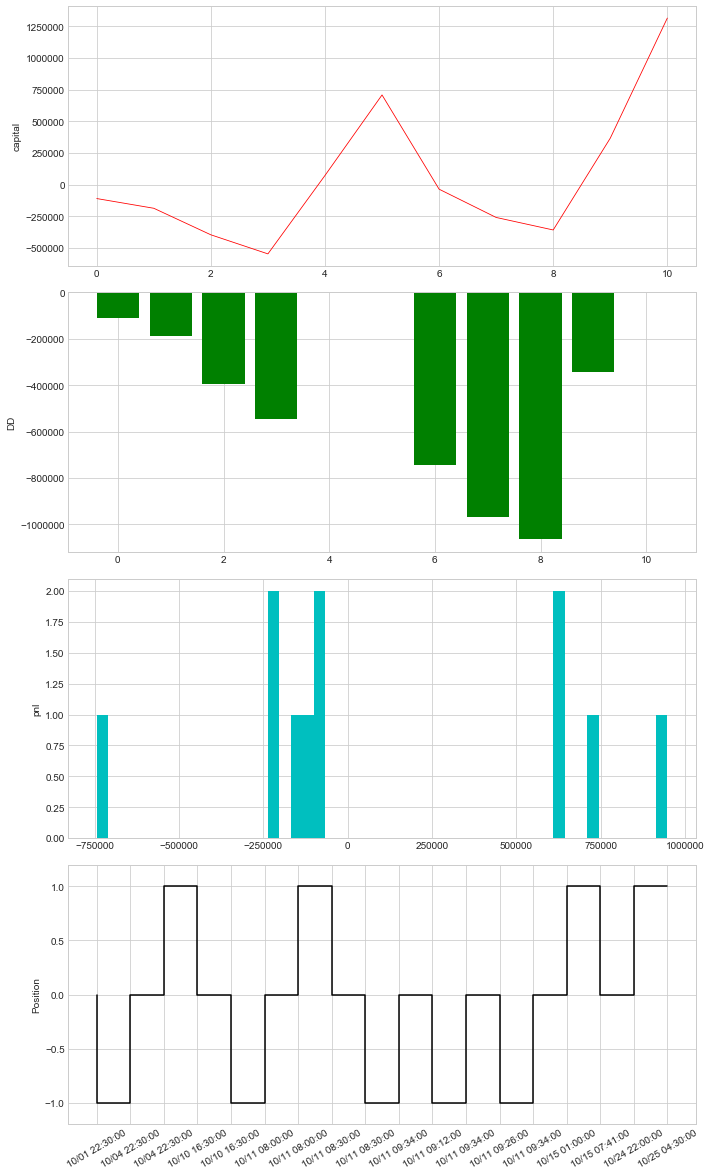

2018-11-15 17:14:03.262126	计算按日统计结果


In [2]:
from vnpy.trader.app.ctaStrategy.ctaBarManager import BacktestingEngine
import pandas as pd

def runBacktesting(strategyClass, settingDict,
                   startDate, endDate, size, slippage, rate):
    engine = BacktestingEngine()
    engine.setBacktestingMode(engine.BAR_MODE)
    engine.setDatabase('VnTrader_1Min_Db')
    engine.setStartDate(startDate, initHours=200)
    engine.setEndDate(endDate)
    engine.setSize(size)
    engine.setSlippage(slippage)
    engine.setRate(rate)
    engine.initStrategy(strategyClass, settingDict)
    engine.setCapital(100000)
    engine.setLog(True, 'E://log//')
    engine.runBacktesting()
    #显示逐日回测结果
    engine.showDailyResult()
    #显示逐笔回测结果
    engine.showBacktestingResult()
    # 计算回测结果
    perfromance = engine.calculateDailyResult()
    perfromanceDf , result = engine.calculateDailyStatistics(perfromance)
    tradeReport = pd.DataFrame([obj.__dict__ for obj in engine.tradeDict.values()])
    tradeDf = tradeReport.set_index('dt')
    return perfromanceDf, tradeDf

if __name__ == '__main__':
    # 同时传入信号与执行的数据
    performanceReport, tradeReport = \
        runBacktesting(DoubleMaStrategy, {'symbolList': ['BTCUSDT:binance']},
                       '20181001 12:00', '20181031 16:00', 100, 0, 5/10000)
    # tradeReport.to_excel('BBandMa5MinStrategyReport.xlsx')

## 绩效报告

In [3]:
tradeReport

,direction,exchange,exchangeOrderID,fee,gatewayName,offset,orderID,orderTime,price,price_avg,rawData,status,symbol,tradeID,tradeTime,volume,vtOrderID,vtSymbol,vtTradeID
dt,,,,,,,,,,,,,,,,,,,
2018-10-01 22:30:00,空,,,0.0,,开仓,1,,6556.00,0.0,None,,,1,2018-10-01 22:30:00,30.0,1,BTCUSDT:binance,1
2018-10-04 22:30:00,多,,,0.0,,平仓,2,,6586.00,0.0,None,,,2,2018-10-04 22:30:00,30.0,2,BTCUSDT:binance,2
2018-10-04 22:30:00,多,,,0.0,,开仓,3,,6586.00,0.0,None,,,3,2018-10-04 22:30:00,30.0,3,BTCUSDT:binance,3
2018-10-10 16:30:00,空,,,0.0,,平仓,4,,6567.03,0.0,None,,,4,2018-10-10 16:30:00,30.0,4,BTCUSDT:binance,4
2018-10-10 16:30:00,空,,,0.0,,开仓,5,,6567.03,0.0,None,,,5,2018-10-10 16:30:00,30.0,5,BTCUSDT:binance,5
2018-10-11 08:00:00,多,,,0.0,,平仓,6,,6630.21,0.0,None,,,6,2018-10-11 08:00:00,30.0,6,BTCUSDT:binance,6
2018-10-11 08:00:00,多,,,0.0,,开仓,7,,6630.21,0.0,None,,,7,2018-10-11 08:00:00,30.0,7,BTCUSDT:binance,7
2018-10-11 08:30:00,空,,,0.0,,平仓,8,,6586.65,0.0,None,,,8,2018-10-11 08:30:00,30.0,8,BTCUSDT:binance,8
2018-10-11 08:30:00,空,,,0.0,,开仓,9,,6586.65,0.0,None,,,9,2018-10-11 08:30:00,30.0,9,BTCUSDT:binance,9
